###0. DATASET CONTEXT

This dataset is derived from [an airline satisfaction survey](https:drive.google.com/file/d/1oKFnhKBtO_-eEYenjplsVJAzbcAOYspq/view) and has already been cleaned.

The objective of this exploratory data analysis (EDA) is to understand the data distribution, identify relevant correlations and their strength, and provide insights to build a model that predicts whether a customer is satisfied or not.

###1. LIBRARIES NEEDED

In [11]:
#Essentials libraries
import pandas as pd #Data manipulation
import numpy as np #Numeric operations
import plotly as pl #Interactive visualizations
import seaborn as sns #Graphs
import matplotlib.pyplot as plt #Boxplots


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #Feature Engineering

from google.colab import files #export files

#2. DATASET LOAD

In [12]:
#Dataset load
df = pd.read_csv('airline-predict-g4-cleaning.csv')

#3. DATASET COPY

In [13]:
#In case any change is necessary
df_copy = df.copy()

#4. DATA OVERVIEW


In [14]:
first_rows = df_copy.head()
last_rows = df_copy.tail()
general_info = df_copy.info()

display(first_rows, last_rows, general_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,2.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0.0,satisfied,0,0,0,1,2.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,2.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0.0,satisfied,1,0,0,1,2.0


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
103589,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,2,3,0.0,neutral or dissatisfied,0,1,0,0,0.0
103590,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,4,0,0.0,satisfied,1,0,0,1,2.0
103591,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,5,4,7,14.0,neutral or dissatisfied,1,1,0,0,2.0
103592,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,1,0,0.0,neutral or dissatisfied,0,1,0,0,0.0
103593,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,3,1,0,0.0,neutral or dissatisfied,1,0,0,0,2.0


None

In [15]:
statistical_summary = df_copy.describe()
categorical_summary = df_copy.describe(include=object)
display(statistical_summary, categorical_summary)


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,...,3.304323,3.640761,3.286397,14.747939,15.178678,0.492480,0.182752,0.310143,0.433394,1.028380
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,...,1.265396,1.175603,1.312194,38.116737,38.698682,0.499946,0.386465,0.462554,0.495546,0.962868
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,2.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [16]:
#Unique values are identified
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    print(col, df_copy[col].unique())

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']
satisfaction ['neutral or dissatisfied' 'satisfied']


#5. UNIVARIABLE ANALYSIS

##5.1. BARPLOTS


These variables could also be represented using pie charts, as they contain a limited number of categories.

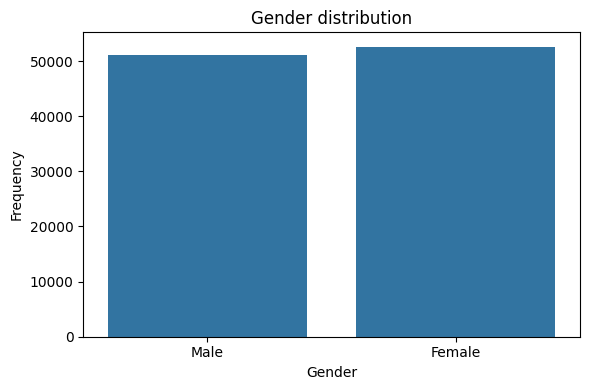

In [24]:
#Barplot of Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

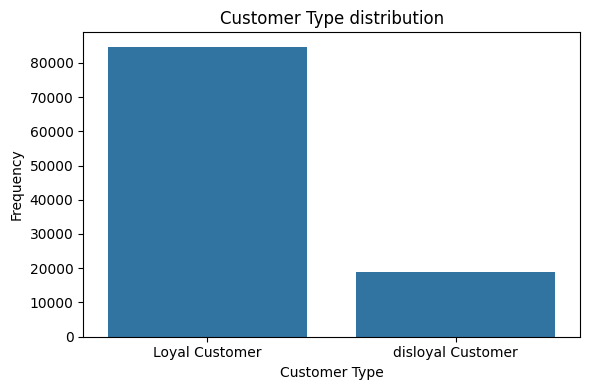

In [25]:
#Barplot of Customer Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Customer Type')
plt.title('Customer Type distribution')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

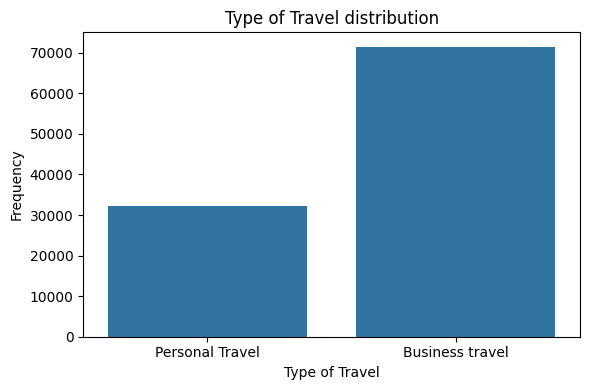

In [26]:
#Barplot of Type of Travel
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Travel')
plt.title('Type of Travel distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

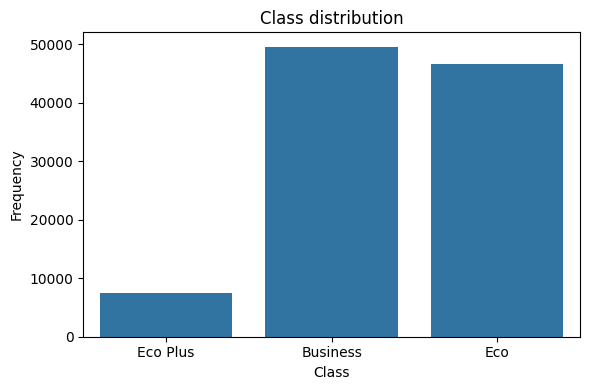

In [27]:
#Barplot of Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##5.2. HISTOGRAMS

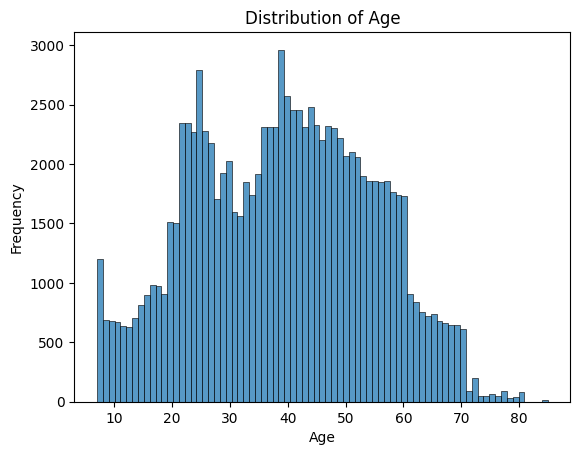

In [22]:
sns.histplot(data=df_copy, x='Age')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()